In [21]:
### Loading Dataset

In [22]:
import pandas as pd

df = pd.read_csv("/content/data/earthquake_alert_balanced_dataset.csv")
df.head()


,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


In [23]:
# SHape of dataset
df.shape

(1300, 6)

In [24]:
### Basic Information About the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB


In [25]:
## df.isnull().sum()
df.isnull().sum()


,0
magnitude,0
depth,0
cdi,0
mmi,0
sig,0
alert,0


In [26]:
df.columns

Index(['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'alert'], dtype='object')

In [27]:
##View Summary Statistics
df.describe()

,magnitude,depth,cdi,mmi,sig
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,7.061008,50.321538,6.976154,6.939231,-9.749231
std,0.423738,104.348286,2.244875,1.354774,62.245214
min,6.500000,2.000000,0.000000,1.000000,-128.000000
25%,6.700000,12.000000,6.000000,6.000000,-54.000000
50%,7.000000,19.000000,8.000000,7.000000,-7.000000
75%,7.300000,38.000000,8.000000,8.000000,31.000000
max,8.600000,670.000000,9.000000,9.000000,127.000000


In [28]:
## Check for Duplicates
df.duplicated().sum()

np.int64(44)

In [29]:
## Removing duplicates
df = df.drop_duplicates()


In [30]:
#Shape after removing duplicates
df.shape

(1256, 6)

In [31]:
## Seeing the unique values
df.nunique()

,0
magnitude,167
depth,173
cdi,10
mmi,9
sig,238
alert,4


In [32]:
## Data Visualization

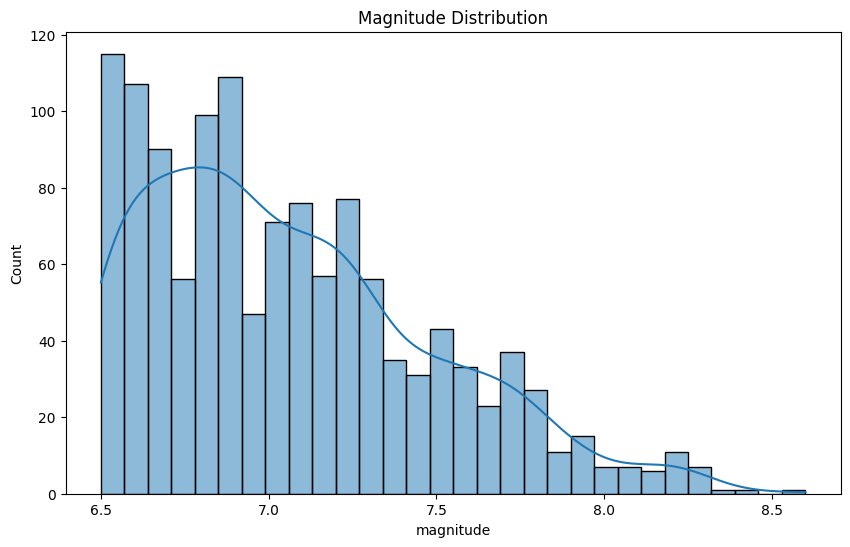

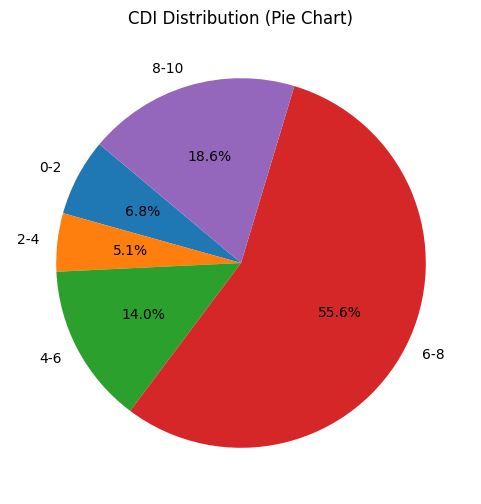

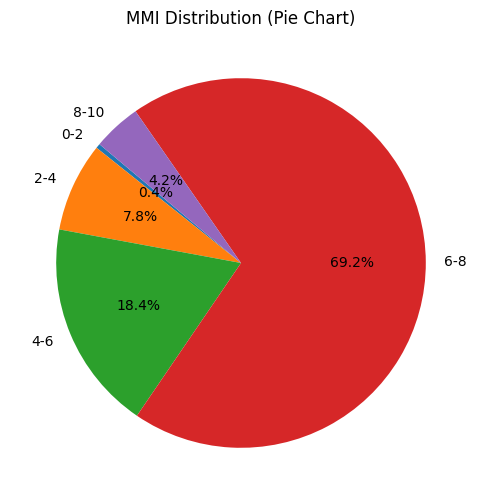

In [33]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Histogram Plot for Magnitude
plt.figure(figsize=(10,6))
sns.histplot(df["magnitude"], kde=True, bins=30)
plt.title("Magnitude Distribution")
plt.show()

bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']

# --- CDI Pie Chart ---
cdi_binned = pd.cut(df['cdi'], bins=bins, labels=labels, include_lowest=True)
cdi_counts = cdi_binned.value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(cdi_counts, labels=cdi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("CDI Distribution (Pie Chart)")
plt.show()

# --- MMI Pie Chart ---
mmi_binned = pd.cut(df['mmi'], bins=bins, labels=labels, include_lowest=True)
mmi_counts = mmi_binned.value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(mmi_counts, labels=mmi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("MMI Distribution (Pie Chart)")
plt.show()


In [34]:
df.head()

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


In [35]:
#Target Field
target_df = df['alert']
target_df.head()

,alert
0,green
1,green
2,green
3,green
4,green


In [36]:
# Input Fields
df = df.drop('alert', axis=1)
df.sample(5)

,magnitude,depth,cdi,mmi,sig
742,7.36,21.0,9.0,8.0,46.0
363,7.10,35.0,6.0,4.0,104.0
920,6.80,12.0,8.0,8.0,32.0
563,6.91,12.0,9.0,8.0,16.0
1138,7.70,21.0,8.0,8.0,32.0


In [36]:
## Encoding for Target Field

In [37]:
from sklearn.preprocessing import OrdinalEncoder
alert_order = [['green','yellow','orange','red']]
encoder_alert = OrdinalEncoder(categories=alert_order)
target_df = encoder_alert.fit_transform(target_df.values.reshape(-1, 1))
target_df[:5]


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [38]:
target_df = target_df.ravel()

In [39]:
#standard scaler to scale the data

In [40]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df=scaler.fit_transform(df)
df=pd.DataFrame(df,columns=scaler.get_feature_names_out())
df.sample(5)

,magnitude,depth,cdi,mmi,sig
686,-0.663650,-0.012440,0.463323,0.060151,-0.202026
1199,0.683521,0.677165,0.017738,0.060151,-1.116277
448,0.187195,-0.352519,0.463323,0.060151,0.567870
1182,-0.001882,0.818865,-0.427846,-0.673337,1.049054
1220,1.605270,-0.295839,0.463323,0.060151,0.118764
